<a href="https://colab.research.google.com/github/sharlynmuturi/Pytorch-Tutorial/blob/main/tumor_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Brain Tumor Dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
import zipfile

zip_path = "data.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data")

In [15]:
tf = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_dl = DataLoader(
    datasets.ImageFolder('data/Training', tf),
    batch_size = 32, shuffle=True, num_workers=4, pin_memory=True
)

test_dl = DataLoader(
    datasets.ImageFolder('data/Testing', tf),
    batch_size = 32, shuffle=False, num_workers=4, pin_memory=True
)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [16]:
model = nn.Sequential(
    nn.Conv2d(3, 32, 3, 1, padding=1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(32, 64, 3, 1, padding=1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(64, 128, 3, 1, padding=1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 512), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(512, 4) # has to be 4 or the 4classes
)


In [17]:
import torch.optim as optim

opt = optim.AdamW(model.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

In [18]:
model.train()

for epoch in range(25):
  running_loss = 0

  for x, y in train_dl:
    opt.zero_grad()
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    loss.backward()

    running_loss += loss.item()
    opt.step()

  print(f"Epoch {epoch} loss: {running_loss / len(train_dl)}")

Epoch 0 loss: 0.8148584142743542
Epoch 1 loss: 0.5311395644975108
Epoch 2 loss: 0.43321799058154975
Epoch 3 loss: 0.3764675184668109
Epoch 4 loss: 0.33016894108423306
Epoch 5 loss: 0.2910469203105186
Epoch 6 loss: 0.25758142040927984
Epoch 7 loss: 0.2354981735889805
Epoch 8 loss: 0.20237827313512396
Epoch 9 loss: 0.18354374748867983
Epoch 10 loss: 0.1589229459556954
Epoch 11 loss: 0.13723853862110796
Epoch 12 loss: 0.12081843161924258
Epoch 13 loss: 0.1118811446725906
Epoch 14 loss: 0.09067200558187243
Epoch 15 loss: 0.0754234015098747
Epoch 16 loss: 0.07725698516350343
Epoch 17 loss: 0.06323732862472742
Epoch 18 loss: 0.05341604981550624
Epoch 19 loss: 0.049541903134206484
Epoch 20 loss: 0.04404459343754879
Epoch 21 loss: 0.04266952461948067
Epoch 22 loss: 0.03510392927980914
Epoch 23 loss: 0.029187148513972198
Epoch 24 loss: 0.03439535251226765


In [19]:
model.eval()

test_loss, correct = 0.0, 0

with torch.no_grad():
  for x, y in test_dl:
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    test_loss += loss.item() * y.size(0)

    preds = y_hat.argmax(dim=1)
    correct += (preds == y).type(torch.float).sum().item()

test_loss /= len(test_dl.dataset)
accuracy = 100 * correct / len(test_dl.dataset)

print(f"Test Loss: {test_loss}, Accuracy %: {accuracy}")

Test Loss: 0.11616034665587908, Accuracy %: 96.64378337147215


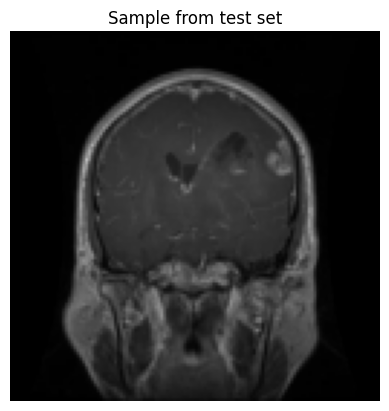

In [20]:
import random

import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

model.eval()

idx = random.randrange(len(test_dl.dataset))
img, label = test_dl.dataset[idx]

unnorm = img * 0.5 + 0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title('Sample from test set')
plt.show()

In [21]:
with torch.no_grad():
  y_hat = model(img.unsqueeze(0))
  pred = y_hat.argmax(dim=1).item()

class_names = test_dl.dataset.classes
print(f"Predicted class: {class_names[pred]}")
print(f"Ground-truth: {class_names[label]}")

Predicted class: glioma
Ground-truth: glioma
